# **Project-3**

***Project Title:*** Predicting Diabetes

***Project Description:*** In this project, you will build a machine learning model to predict whether a person has diabetes or not based on their health metrics such as BMI, blood pressure, glucose levels, etc. The data set includes information on individuals' health metrics, including whether they have diabetes or not.

***Dataset Details:*** The data set contains over 750 records of female patients aged 21 years or older. The dataset has eight features (e.g., age, BMI, blood pressure, insulin level, etc.) and one target variable that indicates whether the person has diabetes or not.

Pregnancies: Number of pregnancies

Glucose: Glucose level in blood

BloodPressure: Blood pressure

SkinThickness: Thickness of the skin

Insulin: Insulin level in blood

BMI: Body Mass Index

DiabetesPedigreeFunction: Inheritance of diatbetes condition through generations

Age: Age

Outcome: 1 is Diabetic, 0 is non-Diabetic

***Datasets Location:*** Canvas -> Modules -> Week 9 -> Datasets -> **"patients.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several machine learning models on the preprocessed data set.

3) *Model Evaluation:* You will evaluate the models' performance using several metrics such as accuracy, precision, recall, specificity, F1-score, and ROC curve analysis. You will also compare the models' performance and select the best-performing one.

4) *Deployment:* Once you have selected the best-performing model, you will deploy it and make predictions on new, unseen data.

This project will give you hands-on experience with supervised classification, data preprocessing, and model evaluation. It also has real-world applications in healthcare, where early detection of diabetes can help in the timely management of the disease.

Check all metrics:

- F1 score
- ROC curve
- Precision score
- Accuracy score

Use stratified sampling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

patients = pd.read_csv("patients.csv")

#Modified loop from https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/

# patients.describe()
#Check for missing values
missingValues = patients.isna()
missingFlag = True

for col in missingValues.columns:
    for index, valueInIndex in missingValues[col].items():
        if valueInIndex:
            print(f"Missing value at index {index} in column {col}")
            missingFlag = False
        

if missingFlag:
    print("There are no missing values in the DataFrame")

There are no missing values in the DataFrame


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#Modified from stepbystep
#Preprocess data
strat_shuff_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

X = patients.drop(columns=['Outcome'])
y = patients['Outcome']


for train_index, test_index in strat_shuff_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 


num_feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
            'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Modifed from stepbystep project

#function to fit and print model
def fit_and_print(myPipeline, myXTrain, myYTrain, myXTest, myYTest):
  myPipeline.fit(myXTrain, myYTrain)
  test_preds = myPipeline.predict(myXTest)

  #Modified from https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
  confusion = confusion_matrix(y_test, test_preds)

  TN = confusion[0, 0]
  FP = confusion[0, 1]

  specificity = TN / (TN + FP)

  print("Accuracy: " + str(accuracy_score(test_preds, myYTest)))
  print("Precision Score: " + str(precision_score(test_preds, myYTest)))
  print("F1 Score: " + str(f1_score(test_preds, myYTest)))
  print("Recall Score: " + str(recall_score(test_preds, myYTest)))
  print("Specificity Score:", specificity)


myText


In [4]:
#Modified from Chapter 3 Classification in class project
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


#function to print graph of ROC curve
def create_ROC_curve(p_y_test, probs):

    fpr, tpr, thresholds = roc_curve(p_y_test, probs)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_score(p_y_test, probs)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [5]:
#Modified from chapter 3 classification in-class project
from sklearn.metrics import precision_recall_curve

#function to create graph of precision recall curve
def create_precision_recall_curve(precision, recall, thresholds):

    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([min(thresholds), max(thresholds), 0, 1])

Logistic Regression:
Accuracy: 0.7933333333333333
Precision Score: 0.54
F1 Score: 0.6352941176470589
Recall Score: 0.7714285714285715
Specificity Score: 0.92


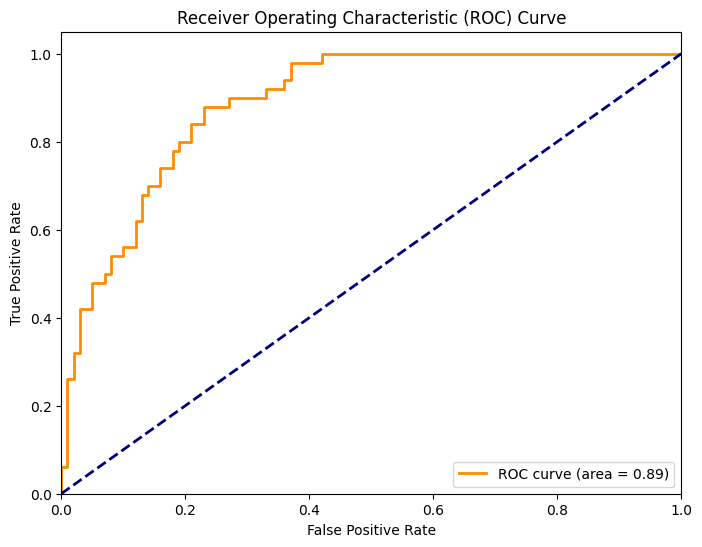

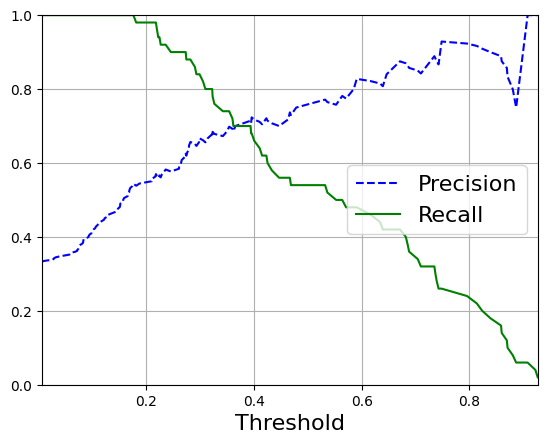

In [6]:
#An imputer was not used here due to the data set not having any null values
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#For later use
from sklearn.model_selection import GridSearchCV


#Preparing, using, and print out graphs and metrics of model
log_clf = LogisticRegression(random_state=42, solver='lbfgs')

preprocess = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', log_clf)
])

print("Logistic Regression:")

fit_and_print(preprocess, X_train, y_train, X_test, y_test)

#modified from Chapter 3 classification in-class project
prob = preprocess.predict_proba(X_test)[:, 1]
create_ROC_curve(y_test, prob)

prob = preprocess.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)




Accuracy: 0.7933333333333333
Precision Score: 0.54
F1 Score: 0.6352941176470589
Recall Score: 0.7714285714285715
Specificity Score: 0.92


C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

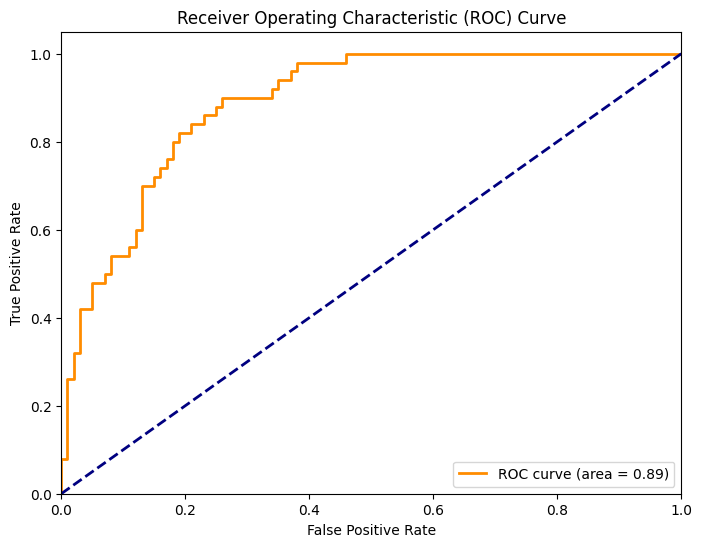

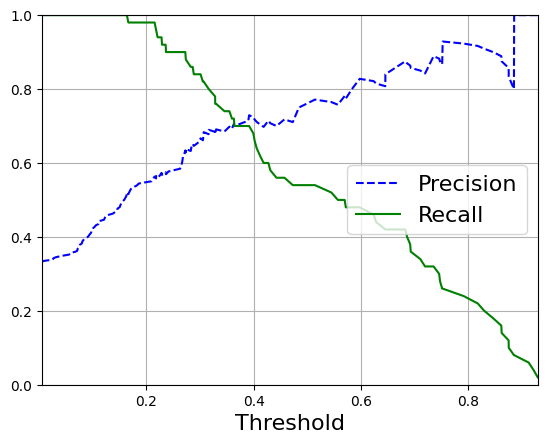

In [7]:
grid_search_log = {
    'C' : [0.6, 0.8, 1.0],
    'solver' : ['lbgfs', 'liblinear', 'newton-cg']
}

grid_search_log_var = GridSearchCV(LogisticRegression(), grid_search_log, cv=5, n_jobs=1)

fit_and_print(grid_search_log_var, X_train, y_train, X_test, y_test)

prob = grid_search_log_var.predict_proba(X_test)
create_ROC_curve(y_test, prob[:, 1])

precision, recall, thresholds = precision_recall_curve(y_test, prob[:, 1])
create_precision_recall_curve(precision, recall, thresholds)

Random Forest Classifier:
Accuracy: 0.82
Precision Score: 0.66
F1 Score: 0.7096774193548386
Recall Score: 0.7674418604651163
Specificity Score: 0.9


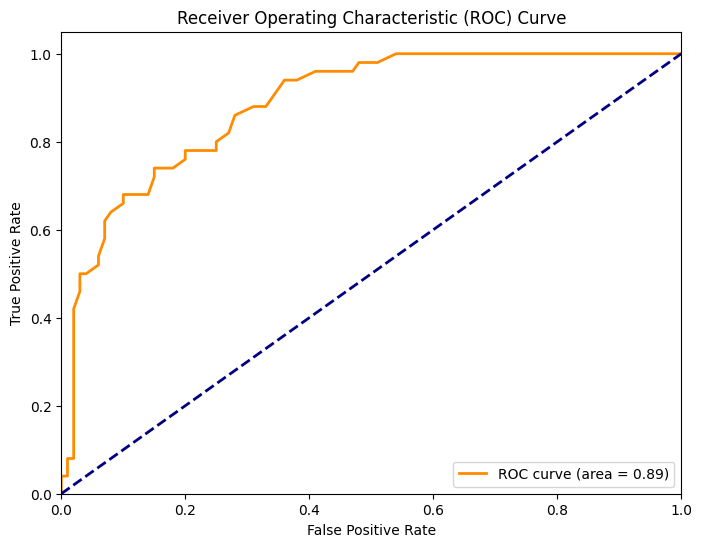

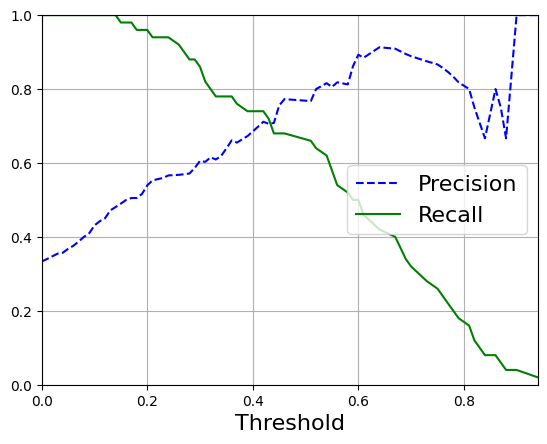

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

#Preparing, using, and print out graphs and metrics of model

print("Random Forest Classifier:")
fit_and_print(rnd_clf, X_train, y_train, X_test, y_test)

prob = rnd_clf.predict_proba(X_test)[:,1]
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)




Accuracy: 0.7933333333333333
Precision Score: 0.56
F1 Score: 0.6436781609195402
Recall Score: 0.7567567567567568
Specificity Score: 0.91


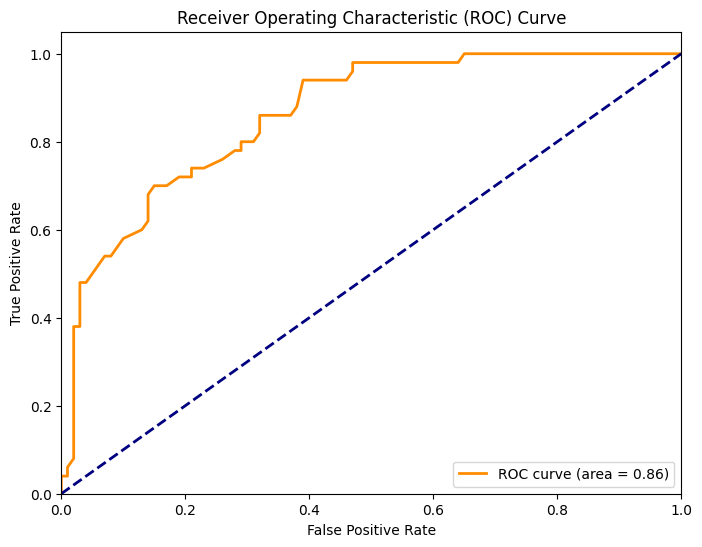

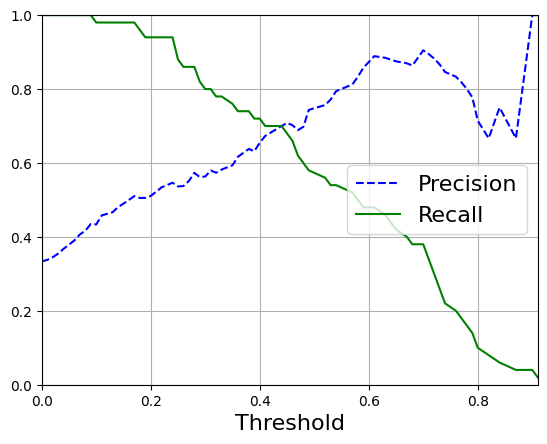

In [9]:
grid_search_rnd = {
    'n_estimators' : [1, 10, 100],
    'max_depth' : [10, 50, 100, None]
}

grid_search_rnd_var = GridSearchCV(RandomForestClassifier(), grid_search_rnd, cv=5, n_jobs=1)

fit_and_print(grid_search_rnd_var, X_train, y_train, X_test, y_test)

prob = grid_search_rnd_var.predict_proba(X_test)[:, 1]
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)

Support Vector Classifier:
Accuracy: 0.78
Precision Score: 0.48
F1 Score: 0.5925925925925926
Recall Score: 0.7741935483870968
Specificity Score: 0.93


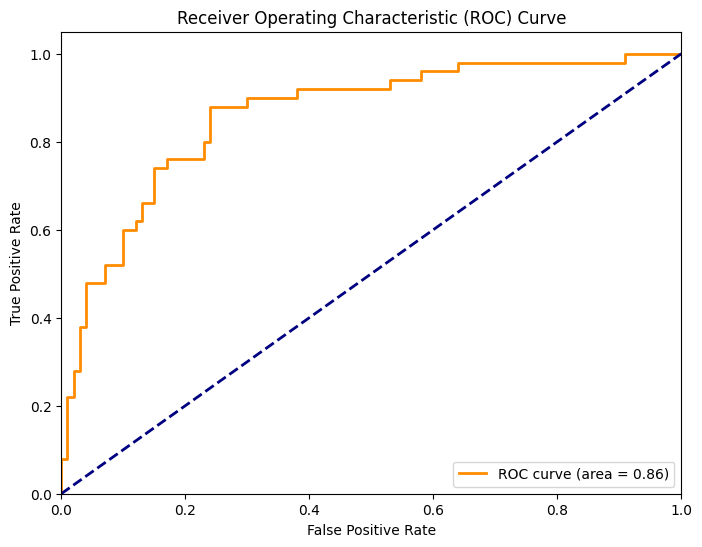

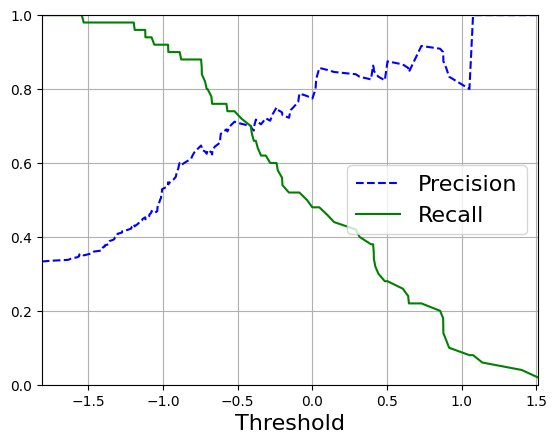

In [10]:
print("Support Vector Classifier:")

#Preparing, using, and print out graphs and metrics of model

svc_clf = SVC(gamma='scale', random_state=42)

fit_and_print(svc_clf, X_train, y_train, X_test, y_test)

prob = svc_clf.decision_function(X_test)
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)



Accuracy: 0.7866666666666666
Precision Score: 0.48
F1 Score: 0.6
Recall Score: 0.8
Specificity Score: 0.94


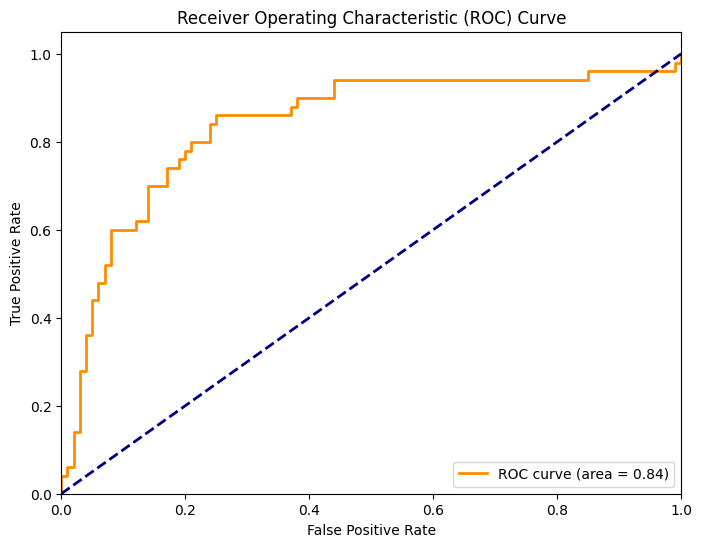

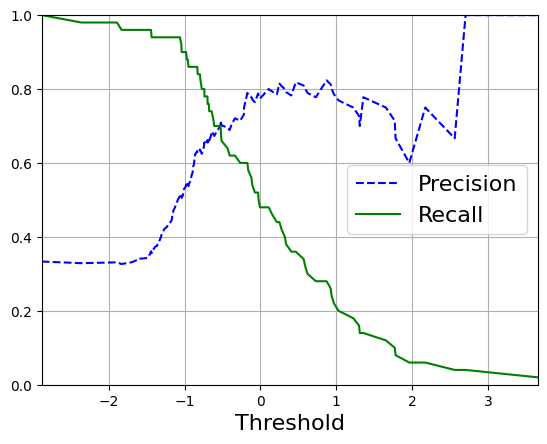

In [11]:
grid_search_SVC = {
    'kernel' : ['poly', 'rbf', 'sigmoid']
}

grid_search_SVC_var = GridSearchCV(SVC(), grid_search_SVC, cv=5, n_jobs=1)

fit_and_print(grid_search_SVC_var, X_train, y_train, X_test, y_test)

prob = grid_search_SVC_var.decision_function(X_test)
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)

Accuracy: 0.8066666666666666
Precision Score: 0.56
F1 Score: 0.6588235294117648
Recall Score: 0.8
Specificity Score: 0.93


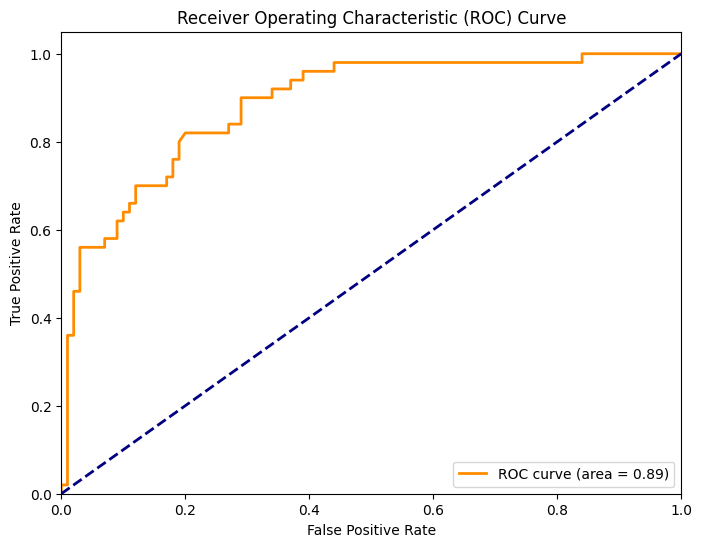

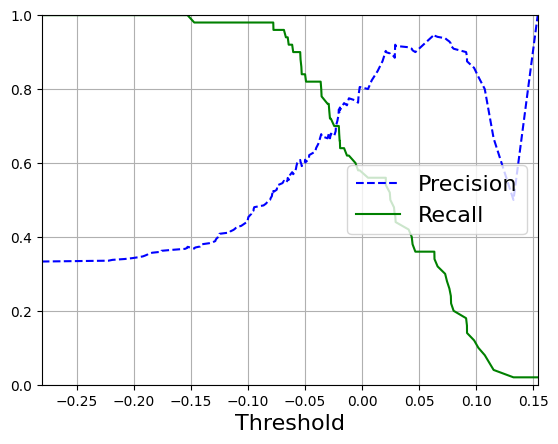

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Preparing, using, and print out graphs and metrics of model

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5, random_state=42
)

fit_and_print(ada_clf, X_train, y_train, X_test, y_test)

prob = ada_clf.decision_function(X_test)
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)

Accuracy: 0.8
Precision Score: 0.56
F1 Score: 0.6511627906976745
Recall Score: 0.7777777777777778
Specificity Score: 0.92


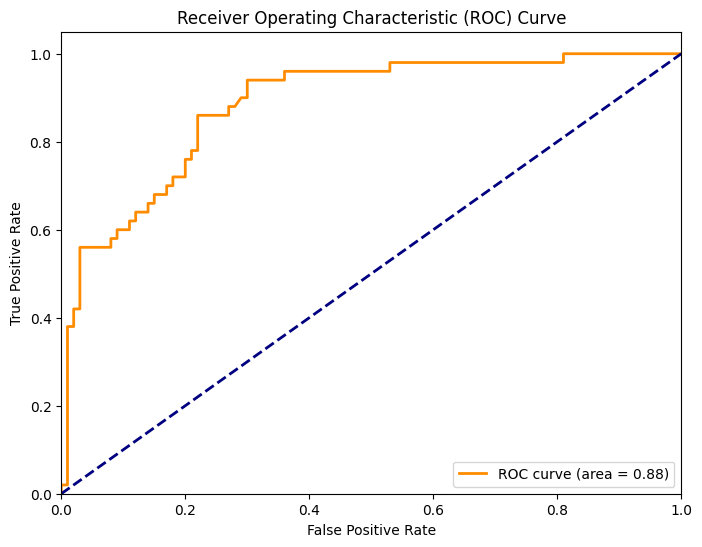

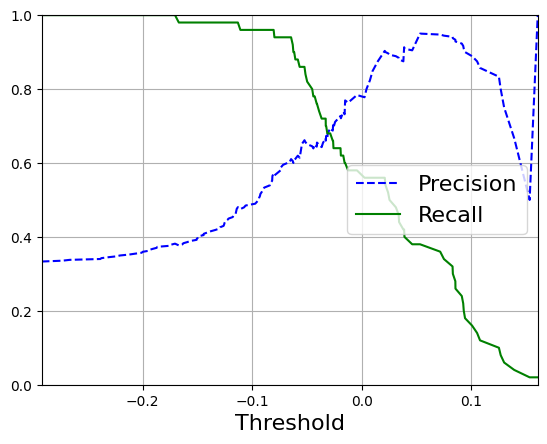

In [13]:
#Modified from stepbystep
from sklearn.model_selection import GridSearchCV

#Preparing, using, and print out graphs and metrics of model

grid_search_ada = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.2, 0.4, 0.6]

}

grid_search_ada_var = GridSearchCV(AdaBoostClassifier(), grid_search_ada, cv=5, n_jobs=1)

fit_and_print(grid_search_ada_var, X_train, y_train, X_test, y_test)

prob = grid_search_ada_var.decision_function(X_test)
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)



In [14]:
#Modified from Chapter 7 Ensemble Learning and Random Forests
from sklearn.ensemble import VotingClassifier
print("Hard Voting Classifier:\n")

#Preparing, using, and print out graphs and metrics of model



voting_clf = VotingClassifier(
    estimators=[('lr', grid_search_log_var.best_estimator_), 
                ('rnd', grid_search_rnd_var.best_estimator_), 
                ('svc', grid_search_SVC_var.best_estimator_),
                ('ada', grid_search_ada_var.best_estimator_)], 
    voting = 'hard'
)


fit_and_print(voting_clf, X_train, y_train, X_test, y_test)

print("\n")

print("Best Log Regression:\n")
print(grid_search_log_var.best_estimator_)
print("\n")

print("Best Random Forest:\n")
print(grid_search_rnd_var.best_estimator_)
print("\n")

print("Best SVC:\n")
print(grid_search_SVC_var.best_estimator_)
print("\n")

print("Best Ada Boost:\n")
print(grid_search_ada_var.best_estimator_)
print("\n")



Hard Voting Classifier:

Accuracy: 0.78
Precision Score: 0.46
F1 Score: 0.5822784810126583
Recall Score: 0.7931034482758621
Specificity Score: 0.94


Best Log Regression:

LogisticRegression(solver='newton-cg')


Best Random Forest:

RandomForestClassifier()


Best SVC:

SVC(kernel='poly')


Best Ada Boost:

AdaBoostClassifier(learning_rate=0.2, n_estimators=100)


